# <h1><center>Stock prediciton using machine learning</center></h1> 

## Objectives

1. Introduction
2. Objective
3. Data Collection
    + 3.1 Data description
4. Python Libraries  
5. Data Reading from CSV files
6. Data Cleaning
    + 6.1 Reasons
    + 6.2 Steps to cleanup the data
        + 6.2.1 Finding Missing Data by Heatmap
           + 6.2.1.1 Heatmap for train data
           + 6.2.1.2 Heatmap for features data
           + 6.2.1.3 Heatmap for store data
        + 6.2.2 Drop large missing values
           + 6.2.2.1 Clean Up - Markdowns
        + 6.2.3 Fill the missing values with mean value of corresponding coloumns of data
7. Feature selection
8. Exploratory Data Analysis
9. Classification
    + 9.1 Feature - Type
    + 9.2 Classification based on type and holidays
10. Regression
    + 10.1 Segregation of Features and Lables
    + 10.2 Train/Test Split
    + 10.3 Regression models
        + 10.3.1 Linear Regression
        + 10.3.2 Extra Tree Regressor
        + 10.3.3 Support Vector Machine
    + 10.4 Evaluation of models
        + 10.4.1 Explained variance score
        + 10.4.2 MAE
        + 10.4.3 MSE
        + 10.4.2 RMSE
+ References
    + Notebooks
    + Figures and Equations
    + Internet Documents
    + E-books

## Introduction


The major challenge that any conventional store facing is to get the ball park estimate of the level of inventory needed to avoid being out of stock. Though there is a variety of vendor tools to predict sales around extreme weather events, but it's an ad-hoc and time-consuming process that lacks a systematic measure of effectiveness. On assessing the factors which prove to deeply influence the quantity of sales, we have weather as an indispensable one. As weather deeply influences the mood and the spending capability of a person, it is almost directly related to the level of sales in chain stores. The main aim of this project is to identify a suitable machine learning algorithm to predict the sale of weather sensitive products.

## Objective

To build a robust model that can predict the sales accurately by including all the demand forecasting challenges

This time we used diferent set of data than that of last time. Because the data from last time was very huge and has many missing data. Hence we got some new data from Kaggle which was more easy to adapt.

This walmart historical sales data for 45 Walmart stores located in different regions.

This data also has some fantastic features than last time which can affect the sales forecast at real time.
Promotional offers such as markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are as below
    
    a.Super Bowl, 
    b.Labor Day, 
    c.Thanksgiving, and 
    d.Christmas.
    
The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

## Data collection 

The value of the sales were obtained from the walmart form Kaggle(https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data). 

## Data description

+ Store.csv - This file contains anonymized information about the 45 stores, indicating the type and size of store.
+ train.csv -This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields
+ test.csv-This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file. 
+ features.csv-This file contains additional data related to the store, department, and regional activity for the given dates. 

        Store - the store number
        Date - the week
        Temperature - average temperature in the region
        Fuel_Price - cost of fuel in the region
        MarkDown1-5 - anonymized data related to promotional markdowns 
        CPI - the consumer price index
        Unemployment - the unemployment rate
        IsHoliday - whether the week is a special holiday week

In [10]:
import pandas as pd
import numpy as np
import plotly
from plotly import __version__#
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

### Reading the data from CSV files

The walmart data is in .csv files as explained above, so we need to read this data using pandas library and assign it to Data frames. Below methods are reading data files from train.csv,features.csv and stores.csv

In [2]:
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
store_df = pd.read_csv('stores.csv')#
train_df.info()
#features_df.head()
#store_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


## Data cleaning 

In real life, when we asked for data from any store, there are high chances that data will not be so perfect that you can use it directly for predictions. Below are the reasons why it will not be perfect

1. Data will be missing for certain extent. It will have either string value 'M' or 'nan' values associated with it
2. Data will have generic data types(object, string) when it will have any missing data associated with it.
3. Data will be given in multiple irrelevent files so you have to strugle bit to merge the corrseponding data

With the above reasons, we have got a job to clean up the data before proceeding to modelling.

** Steps to cleanup the data**
1. First find out where all missing data exists by heatmap.
2. If the missing data is big then drop the corresponding columns else move to step 3
3. Fill the missing values with mean value of corresponding coloumns of data
4. Finalise the data with single data type with no missing values


Below graph is indicative to the existince of any missing values(NA) in the train.csv dataframe
From the empty graph below, there is no missing data.

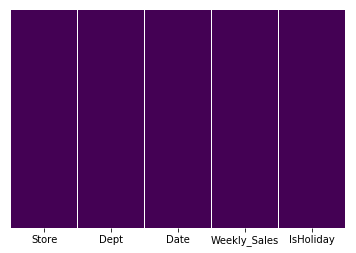

In [114]:
sns.heatmap(train_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')#

When we checked same heatmap for features data then we can see quite a big data missing for Markdowns 1-5. Generally for this kind of missing data, we will drop the missing data columns which can seriously affect the modelling 

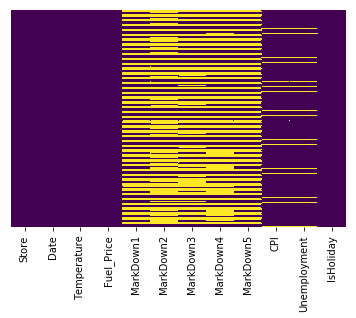

In [115]:
sns.heatmap(features_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [3]:
features_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)



Below graph is indicative to the existince of any missing values(NA) in the store.csv dataframe
From the empty graph below, there is no missing data.

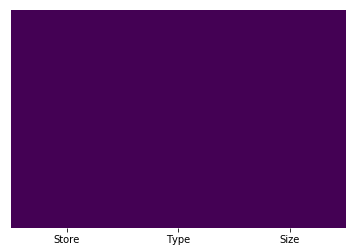

In [117]:
sns.heatmap(store_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

From heatgraph, there were quite a few missing data in CPI and unemployment columns.
We can replace this missing data with average of their columns

In [4]:
features_df['CPI'].fillna(features_df['CPI'].mean(),inplace=True)
features_df['Unemployment'].fillna(features_df['Unemployment'].mean(),inplace=True)



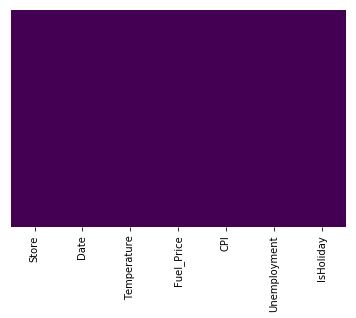

In [119]:
sns.heatmap(features_df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

## Feature selection

Once data is cleaned up then we need to select features that need to be evaluated.
1. Combin this merged data with train data on store number and date as key
2. Set your final train data with reference to x and y axes.
3. Format the data column and set year,month and day into new seperate column 

In [5]:
train_x=pd.DataFrame()
train_x=store_df.merge(train_df,on='Store')
train_x=train_x.merge(features_df,on=['Date','Store','IsHoliday'])


train_x['year'] = [int(x[0:4]) for x in list(train_x['Date'])]
train_x['month'] = [int(x[5:7]) for x in list(train_x['Date'])]
train_x['day'] = [int(x[8:]) for x in list(train_x['Date'])]
train_x.drop(['Date'],axis=1,inplace=True)

We see that there are few values in the Weekly sales coulmn to be 0, We also know that the weekly sales of the particular department cannot be zero,(even if there are no sale , it should have been due to an unusual circumstances that are unlikely to occur in the future). The observed data cannot be replaced with the mean of the value as it might wrongly predict the sale for the near future by making changes in the trend.

In [6]:
train_x=train_x[train_x['Weekly_Sales'] != 0]
train_x[train_x['Weekly_Sales'] == 0].count()


Store           0
Type            0
Size            0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
year            0
month           0
day             0
dtype: int64

In [11]:

train_y=pd.DataFrame()

train_y['Weekly_Sales']=train_x['Weekly_Sales']



,Store,Type,Size,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,year,month,day
0,1,0,151315,1,24924.50,False,42.31,2.572,211.096358,8.106,2010,2,5
1,1,0,151315,2,50605.27,False,42.31,2.572,211.096358,8.106,2010,2,5
2,1,0,151315,3,13740.12,False,42.31,2.572,211.096358,8.106,2010,2,5
3,1,0,151315,4,39954.04,False,42.31,2.572,211.096358,8.106,2010,2,5
4,1,0,151315,5,32229.38,False,42.31,2.572,211.096358,8.106,2010,2,5


In [ ]:
sns.countplot('Weekly_Sales',data=train_x,hue='Type')

/Users/shanraja/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



# Exploratory

Exploratory analysis helps in understanding the data whether its correlates to any of other features, also indicates type of the regression that needs to be done to model. 

From below pair plot, we can say how store number, size, tempearute fall in distributions.

Store number,Size, department follows almost a uniform distributions and weekly sales almost a logarithemic distributions.

Temeprature and fuel price are highly correlated.


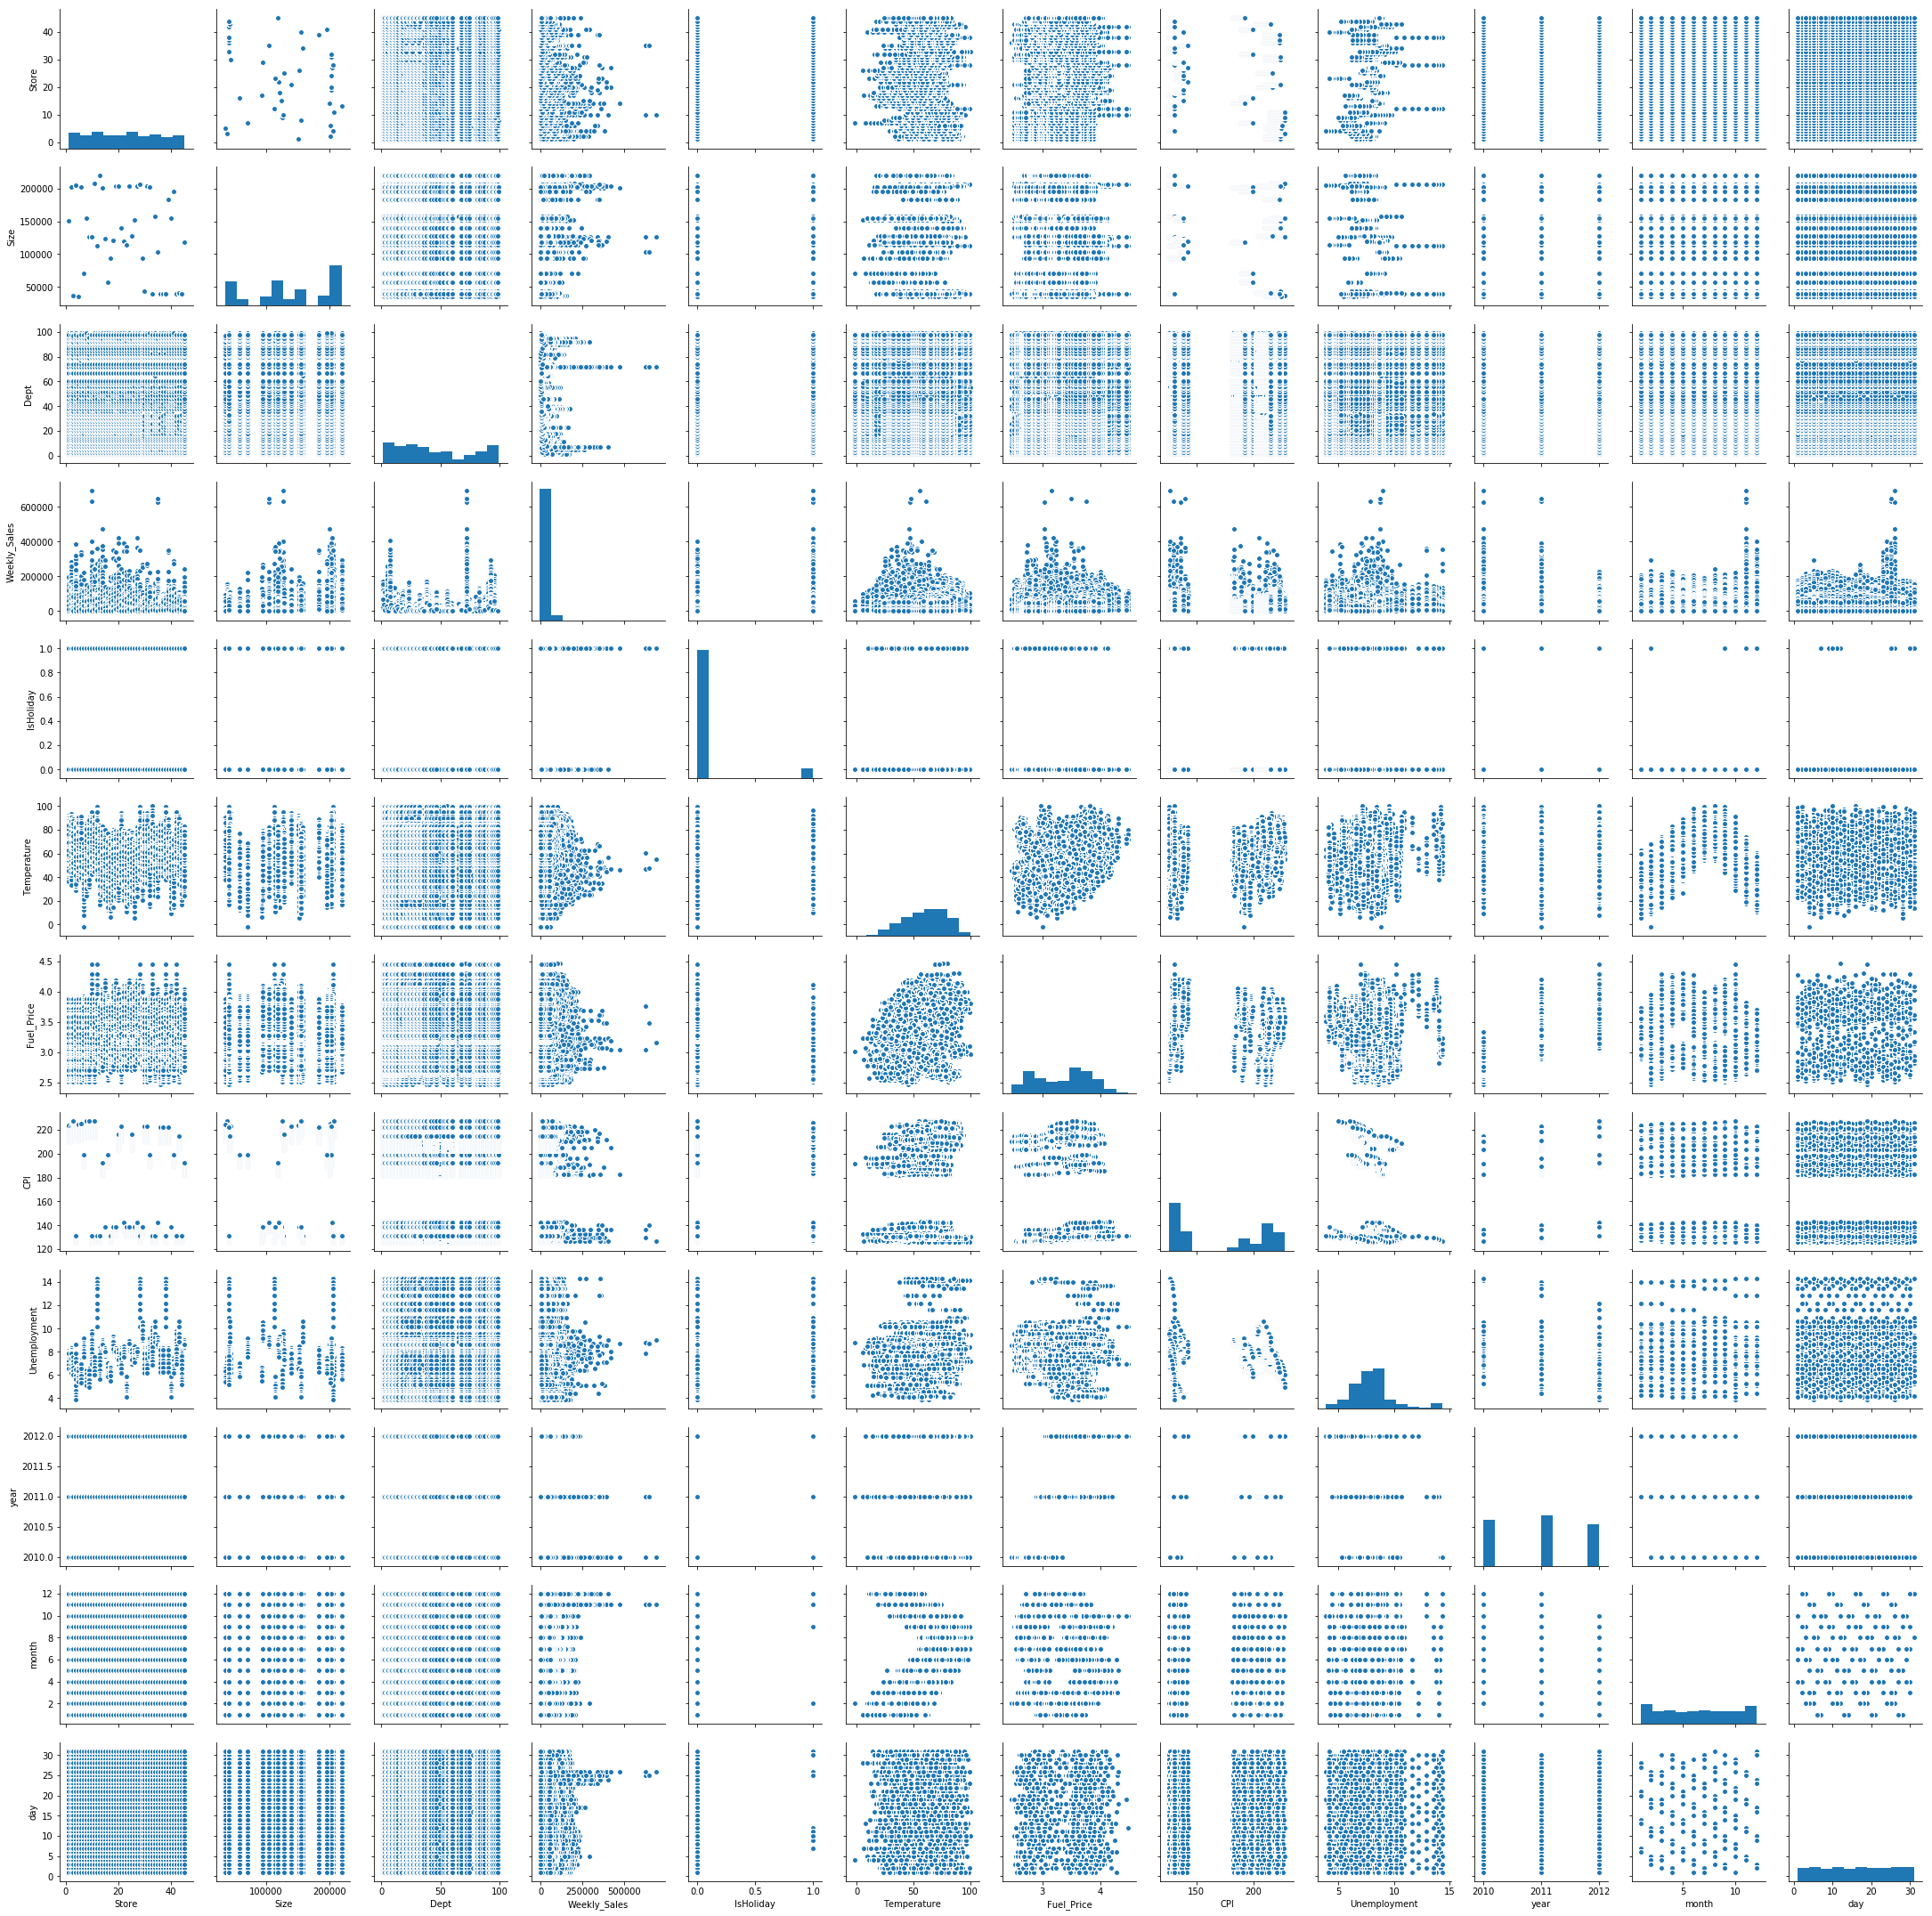

In [56]:
sns.pairplot(train_x)

Below count plot help us to visualise how number of weekly sales depends on the type of store(A,B,C)

Below plot indicates distribution of weekly sales and it is almost follows a logarthmic distribution

/Users/shanraja/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



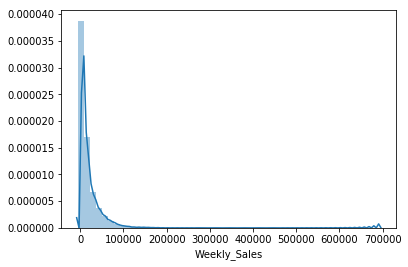

In [86]:
sns.distplot((train_y['Weekly_Sales']))

Below count plot help us to visualise how number of weekly sales depends on holidays and a non-holidays

In [87]:
#train_x.head()
#sns.countplot('Weekly_Sales',data=train_x,hue='IsHoliday')

Boxplotting helps us to find any outliers present in the data.
If outliers present in the data , we generaly remove because they will generally shift the true mean which will generally affect our predictions

From below box plots,
1. CPI - No outliers present in the data
2. Unemployment - Outliers are present on both sides of box plots( This data will need to be removed but at this moemnt we are keeping as it is)
3. Fuel price- No outliers present in the data
4. Temperature- No outliers present in the data 


/Users/shanraja/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



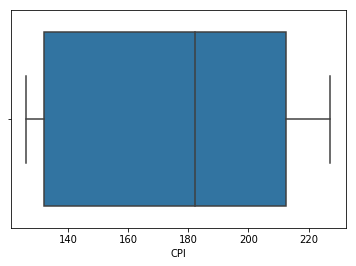

In [88]:
sns.boxplot(train_x['CPI'])

/Users/shanraja/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



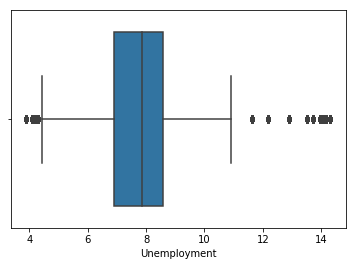

In [89]:
sns.boxplot(train_x['Unemployment'])

/Users/shanraja/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



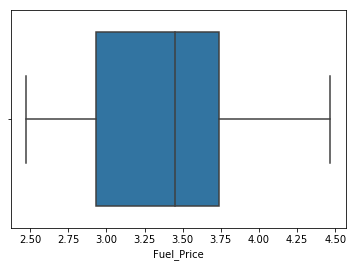

In [90]:
sns.boxplot(train_x['Fuel_Price'])

/Users/shanraja/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



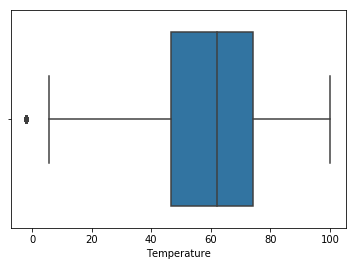

In [91]:
sns.boxplot(train_x['Temperature'])

In [93]:
#sns.boxplot(train_x['Weekly_Sales'])

The string values for the store type will be replaced by correspoinding integer values as 0(A),1(B),2(C)

In [7]:
train_x['Type'].replace(['A','B','C'],[0,1,2],inplace=True)

train_y['Weekly_Sales'].replace(0,1,inplace=True)
train_y.head(100)

,Weekly_Sales
0,24924.50
1,50605.27
2,13740.12
3,39954.04
4,32229.38
5,5749.03
6,21084.08
7,40129.01
8,16930.99
9,30721.50


## Model Evaluation Using Train/Test Split

Here we will split our train data as train and test data for evalution

In [9]:
train_x.drop(['Weekly_Sales'],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=101)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Below method will impliment linear regression on X - input data(All the features) and Y-Output data(Weekly sales).
Fit the curve and find the correponding coefficients
From below coefficients, it looks like store type has more effect on the weekly sales

In [11]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[ -9.34843652e+01   1.94628358e+03   1.04741086e-01   1.11592509e+02
    1.14504522e+03   1.52048768e+01   7.48656567e+01  -1.90729467e+01
   -2.13873613e+02  -2.17166445e+02   1.76096201e+02  -2.02910129e+01]]


In [12]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421497 entries, 0 to 421569
Data columns (total 12 columns):
Store           421497 non-null int64
Type            421497 non-null int64
Size            421497 non-null int64
Dept            421497 non-null int64
IsHoliday       421497 non-null bool
Temperature     421497 non-null float64
Fuel_Price      421497 non-null float64
CPI             421497 non-null float64
Unemployment    421497 non-null float64
year            421497 non-null int64
month           421497 non-null int64
day             421497 non-null int64
dtypes: bool(1), float64(4), int64(7)
memory usage: 39.0 MB


Text(0,0.5,'Predicted Y')

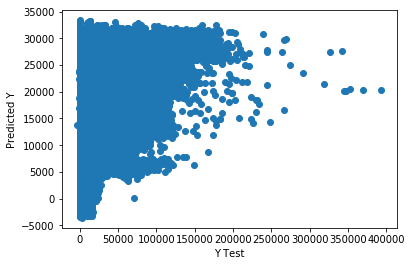

In [105]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


In [13]:
#pearson coefficient 
r2_score(y_test,predictions)

NameError: name 'predictions' is not defined

Thus from the above correlation co-efficient we have that the graph does not follow a linear trend and the linear regression would not suite the purpose of modelling the graph

In [14]:
train_x['year'].astype(str).head(10)
train_x['month'].astype(str).head(10)
train_x['MY']=train_x['month'].astype(str)+train_x['year'].astype(str)
train_x['MY']=train_x['MY'].astype(int)raja


/Users/shanraja/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



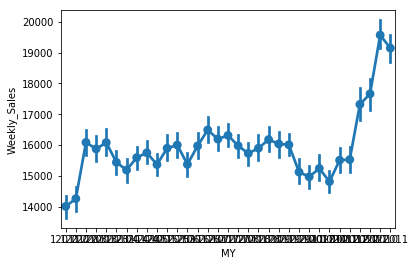

In [108]:
sns.pointplot(train_x['MY'],train_y['Weekly_Sales'])

In [109]:
#from pandas.tools.plotting import autocorrelation_plot
#autocorrelation_plot(train_y)

In [110]:
#from statsmodels.tsa.arima_model import ARIMA

#model = ARIMA(train_y['Weekly_Sales'], order=(10000,2,0))
#model_fit = model.fit(disp=0)
#print(model_fit.summary())
# plot residual errors
#residuals = pd.DataFrame(model_fit.resid)
#residuals.plot()
#pyplot.show()
#residuals.plot(kind='kde')
#pyplot.show()
#print(residuals.describe())

In [ ]:
#non linear poly fit

In [15]:
# Import function to create training and test set splits
from sklearn.cross_validation import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression and a regularized regression function
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
# Finally, import function to make a machine learning pipeline
from sklearn.pipeline import make_pipeline

/Users/shanraja/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [ ]:
#Alpha (regularization strength) of LASSO regression
lasso_eps = 0.0001
lasso_nalpha=25
lasso_iter=5000
# Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.5, random_state=101)
# Make a pipeline model with polynomial transformation and LASSO regression with cross-validation, run it for increasing degree of polynomial (complexity of the model)
for degree in range(degree_min,degree_max+1):
    model = make_pipeline(PolynomialFeatures(degree, interaction_only=False), LassoCV(eps=lasso_eps,n_alphas=lasso_nalpha,max_iter=lasso_iter,
normalize=True,cv=5))
    model.fit(X_train,y_train)
    test_pred = np.array(model.predict(X_test))
    RMSE=np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test,y_test)

/Users/shanraja/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/shanraja/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



In [9]:
train_y

,Weekly_Sales
0,24924.50
1,50605.27
2,13740.12
3,39954.04
4,32229.38
5,5749.03
6,21084.08
7,40129.01
8,16930.99
9,30721.50
